<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simple-concert-plan" data-toc-modified-id="Simple-concert-plan-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simple concert plan</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Simple concert plan
We have four main event that need to happen and each of those m ight have sub-tasks

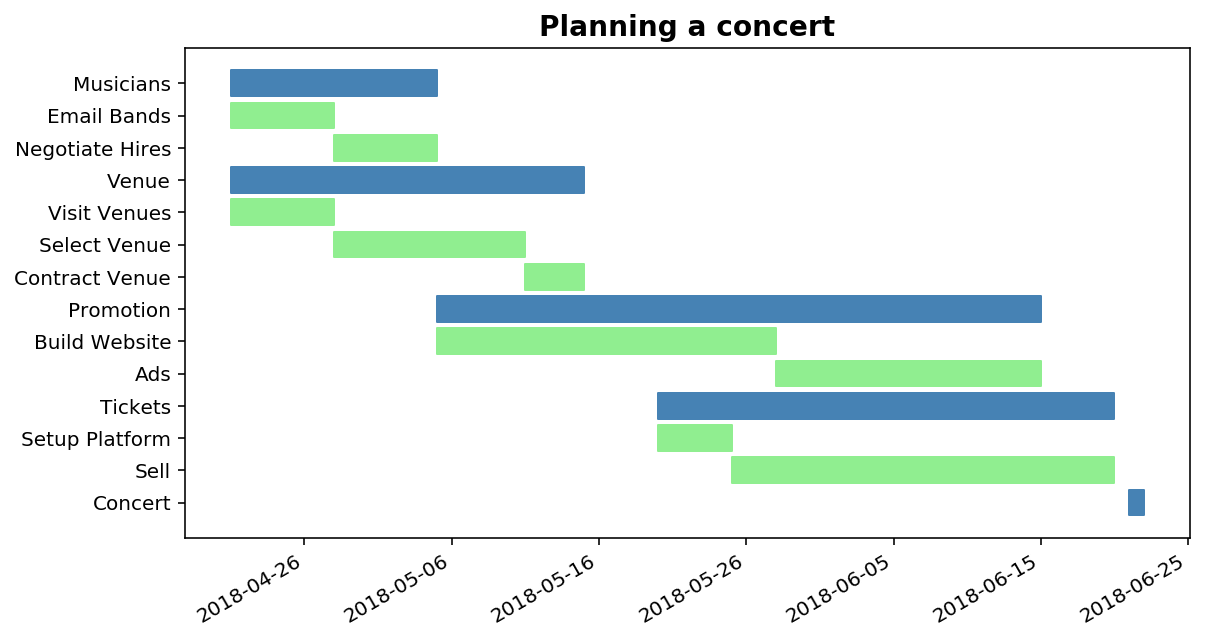

In [23]:
from pygantt.datasets import load_concert
from pygantt.pygantt import gantt
df = load_concert()

gantt(task=df.Task, start=df.Start, finish=df.Finish, 
      task_type=df.Type, color={"main":"steelblue", "sub":"lightgreen"})

plt.title('Planning a concert', {'fontsize': 14, 'fontweight' : 'heavy'});

In [4]:
df

,Task,Start,Finish,Type
0,Musicians,2018-04-21,2018-05-05,main
1,Email Bands,2018-04-21,2018-04-28,sub
2,Negotiate Hires,2018-04-28,2018-05-05,sub
3,Venue,2018-04-21,2018-05-15,main
4,Visit Venues,2018-04-21,2018-04-28,sub
5,Select Venue,2018-04-28,2018-05-11,sub
6,Contract Venue,2018-05-11,2018-05-15,sub
7,Promotion,2018-05-05,2018-06-15,main
8,Build Website,2018-05-05,2018-05-28,sub
9,Ads,2018-05-28,2018-06-15,sub


In [ ]:
# df["Diff"] = date2num(df.Finish) - date2num(df.Start)
# df["Start"] = date2num(df.Start)

# color = {"main":"steelblue", "sub":"lightgreen"}
# fig,ax = plt.subplots(figsize=(6,3))

# labels = []
# for i, task in enumerate(df.groupby("Task")):
#     labels.append(task[0])
#     for r in task[1].groupby("Type"):
#         data = r[1][["Start", "Diff"]]
#         ax.broken_barh(data.values, (i-0.4,0.8), color=color[r[0]] )

# 
# ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax.set_yticks(range(len(labels)))
# ax.set_yticklabels(labels) 
# fig.autofmt_xdate()
# plt.show()

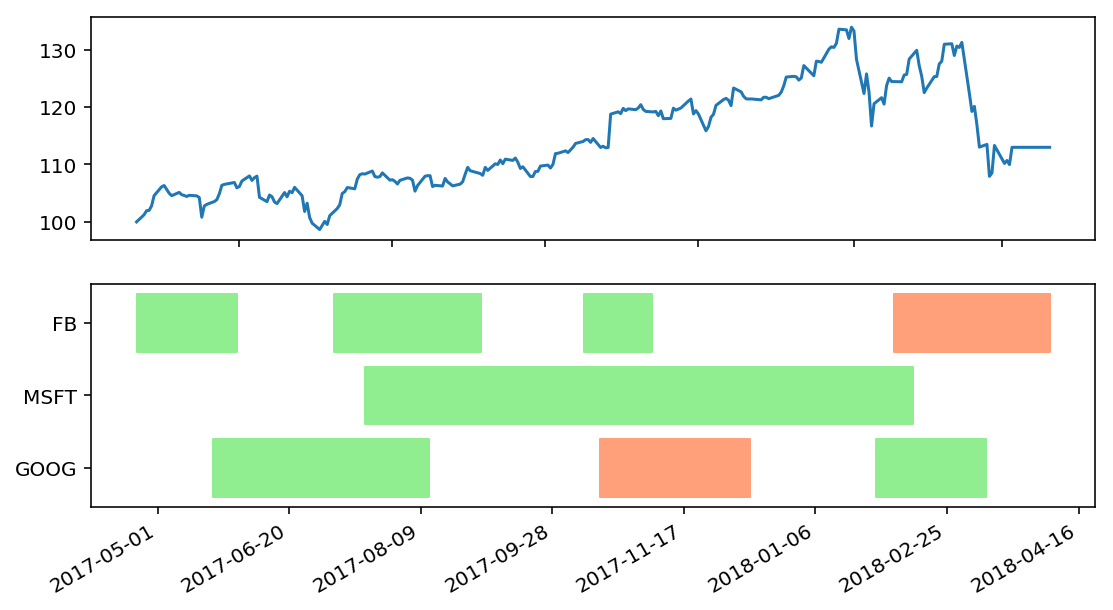

In [47]:
task = df.Asset
start = df.Start
finish = df.Finish
task_type = df.Position
order = None
color = {"long":"lightgreen", "short":"lightsalmon"}
by = df.Asset
fig, axes = plt.subplots( 2,1, figsize=(9,5))

ptf = load_equities_ptf()
axes[0].plot(ptf['Date'], ptf['PTF'])


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


USES_DATES = False    
if np.issubdtype(start.dtype, np.datetime64):
    start = mdates.date2num(start)
    USES_DATES = True
if np.issubdtype(finish.dtype, np.datetime64):
    finish = mdates.date2num(finish)

delta = finish-start

ax = plt.gca()

labels = []
encoded_tasks = dict((v, k) for k, v in enumerate(set(task)))
labels = list(encoded_tasks)
for i, task in enumerate(task):
    j=encoded_tasks[task]
    if color:
        c = color[task_type[i]] 
    else:
        c = None
    ax.broken_barh([(start[i], delta[i])], (j-0.4,0.8), color=c)

# Set yticks
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels) 

# Set xticks formatting
# TODO: use matplotlib.dates.AutoDateFormatter
if USES_DATES:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig = plt.gcf()
    fig.autofmt_xdate()

ax.invert_yaxis()




In [25]:
from pygantt.datasets import load_equities, load_equities_ptf
from pygantt.pygantt import gantt

df = load_equities()
ptf = load_equities_ptf()

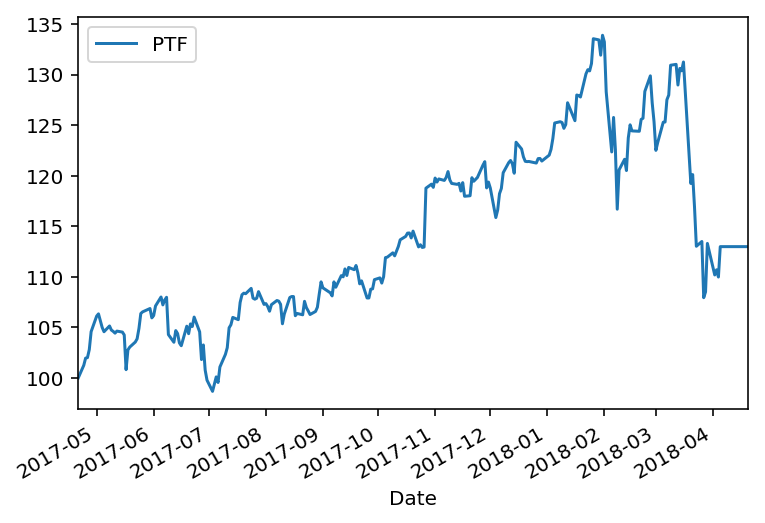

In [8]:
ptf.plot(x='Date',y='PTF')

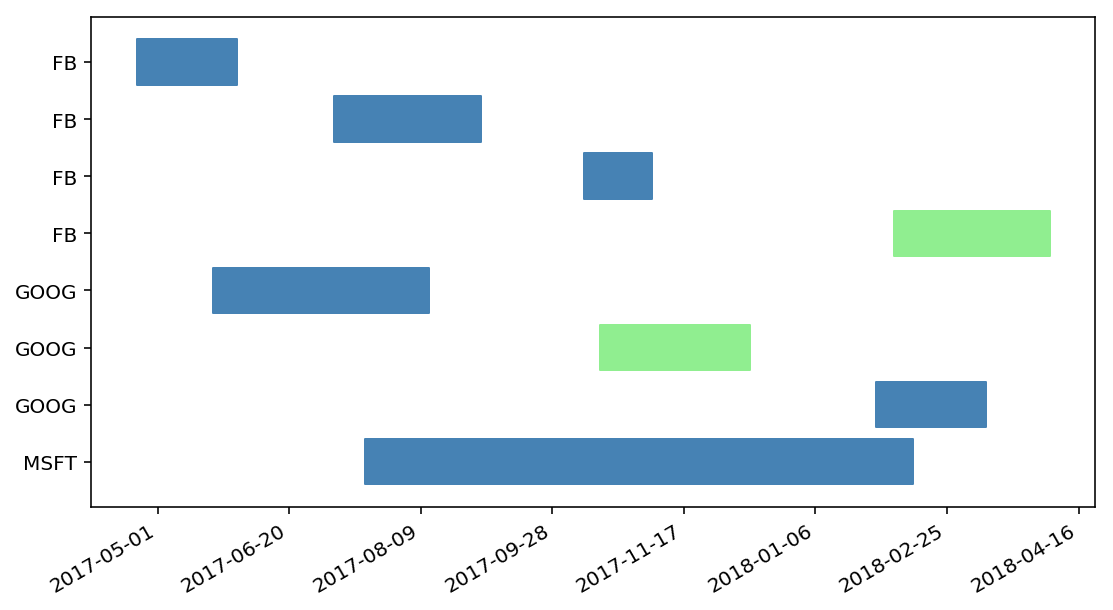

In [9]:
gantt(task=df.Asset, start=df.Start, finish=df.Finish, by=df.Asset,
      task_type=df.Position, color={"long":"steelblue", "short":"lightgreen"})